# UW Data Science 350 - Winter 2017
Dave Wine - 8430191
Assignment 4 - ANOVA

Summary:
1. Neither price nor log(price) is normally distributed.  log(price) is somewhat closer to normal.
2. Fuel Type (Gas vs. Diesel) does not influence log(price) at a 95% confidence level.
3. Aspiration does influence price at a 95% confidence level - Turbos are on average more expensive than standard.
4. Drive type also influences price at a 95% confidence level - rwd are on average more expensive than fwd.
5. The number of doors does not influence price at a 95% confidence level.
6. At a 95% confidence level, there is no significant price difference between wagons and sedans, but there is for both wagons and hatchbacks and hatchbacks vs. sedans.

In [5]:
# Set working directory
setwd("~/GitHub/UW-MDA-2017-DW")

# Import packages
require(ggplot2)
require(car)
require(plyr)
require(dplyr)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Loading required package: car
Warning message:
"package 'car' was built under R version 3.3.2"Loading required package: plyr
Warning message:
"package 'plyr' was built under R version 3.3.2"Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.3.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [35]:
# Functions

# File read function
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  auto.data <- read.csv(file, header=TRUE, stringsAsFactors=FALSE)
  
  numcols <- c('price','peak.rpm')
  auto.data[, numcols]<-lapply(auto.data[,numcols], as.numeric)
  
  factcols <- c('fuel.type','aspiration','drive.wheels','body.style')
  auto.data[, factcols]<-lapply(auto.data[,factcols], as.factor)

  auto.data[complete.cases(auto.data),]
}

# Histogram Plot Function
plot.t <- function(a, b, plotvar,a.name, b.name,cols = c(a.name,b.name), nbins = 20){

  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = plotvar)
  abline(v = mean(a), lwd = 4, col = 'red')
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = plotvar)
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}

# ANOVA Plot Function
ANOVA.plot <- function (df){
df$group = factor(df$group) # Make sure your groups are a factor (for further analysis below
options(repr.plot.width=8, repr.plot.height=5)
boxplot(df$val ~ df$group)

df_aov = aov(val ~ group, data = df)
summary(df_aov)
print(df_aov)

tukey_aov = TukeyHSD(df_aov)  # Tukey's Range test:
tukey_aov
plot(tukey_aov)
print(tukey_aov)
}

Read data into a dataframe:

In [7]:
# Read data in
auto.data = read.auto()

# View dataset and summary statistics
str(auto.data)
summary(auto.data)

Warning message in lapply(auto.data[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.data[, numcols], as.numeric):
"NAs introduced by coercion"

'data.frame':	199 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive.wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2

   symboling       normalized.losses      make            fuel.type  
 Min.   :-2.0000   Length:199         Length:199         diesel: 20  
 1st Qu.: 0.0000   Class :character   Class :character   gas   :179  
 Median : 1.0000   Mode  :character   Mode  :character               
 Mean   : 0.8392                                                     
 3rd Qu.: 2.0000                                                     
 Max.   : 3.0000                                                     
 aspiration  num.of.doors             body.style drive.wheels
 std  :163   Length:199         convertible: 6   4wd:  8     
 turbo: 36   Class :character   hardtop    : 8   fwd:116     
             Mode  :character   hatchback  :67   rwd: 75     
                                sedan      :94               
                                wagon      :24               
                                                             
 engine.location      wheel.base         length          width      
 Length

Test Normality of Price and log(Price)


	Shapiro-Wilk normality test

data:  price
W = 0.96116, p-value = 2.772e-05



	Shapiro-Wilk normality test

data:  price.log
W = 0.96492, p-value = 7.33e-05


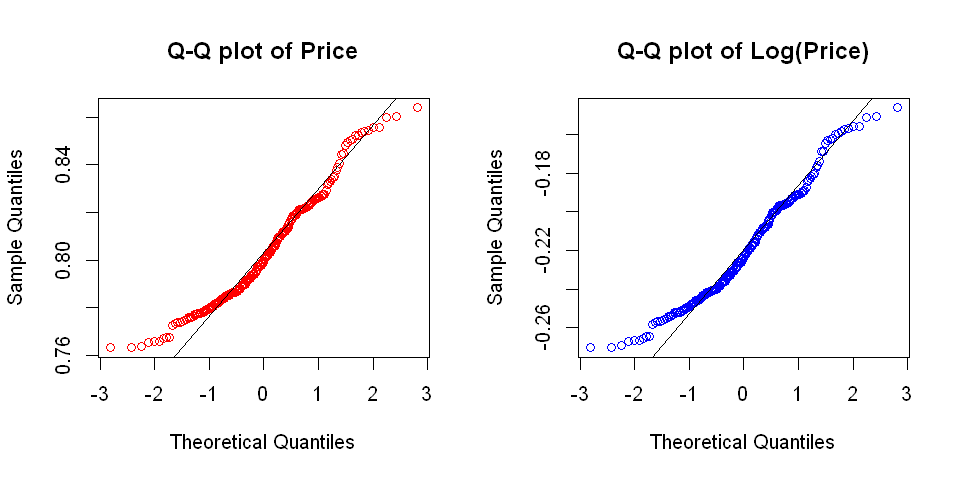

In [25]:
# Normality Testing of Price and log(Price)
price <- auto.data$price
price.log <- log(price)

# Graphical test using qqplot:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1, 2))
qqnorm(price, main ='Q-Q plot of Price',col="red");qqline(price)
qqnorm(price.log, main = 'Q-Q plot of Log(Price)',col="blue");qqline(price.log)
par(mfrow = c(1, 1))
# Neither looks particularly normal. log(Price) may be somewhat more normal.
# This makes some sense in that there are very few cars cheaper than some minimum number.

# Formal Test using Shapiro-Wilk
shapiro.test(price)
shapiro.test(price.log)

# Yes, log(price) is much closer to normal than price - although still not particularly normal.
# So use that instead.
auto.data$price <- log(auto.data$price)

Based on both the quantile plots and the S-W test results (p <=0.05 in both cases), log(price) is much closer to normal than price - although still not particularly normal. So use that instead.

I will use log(Price) for the subsequent calculations.

## Significance of Log(Price) relative to Fuel Type, Aspiration, and front vs. rear wheel drive


	Welch Two Sample t-test

data:  auto.gas and auto.diesel
t = -1.9795, df = 23.73, p-value = 0.05947
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.466760568  0.009882369
sample estimates:
mean of x mean of y 
 9.328981  9.557420 


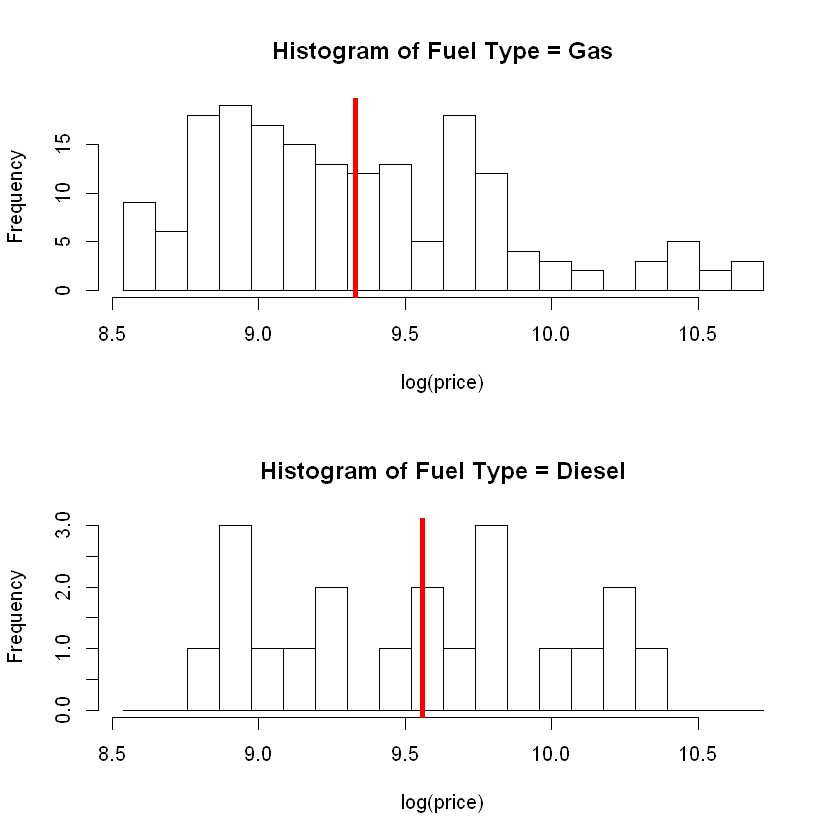

In [14]:
auto.gas=data.matrix(select(filter(auto.data, fuel.type =='gas'),price))
auto.diesel=data.matrix(select(filter(auto.data, fuel.type =='diesel'),price))
plot.t(auto.gas, auto.diesel, 'log(price)','Fuel Type = Gas','Fuel Type = Diesel')
t.test(auto.gas,auto.diesel, alternative = "two.sided")

Based on the p value, we cannot reject the hypothesis that the means are different at a 95% confidence level.


	Welch Two Sample t-test

data:  auto.std and auto.turbo
t = -4.4432, df = 65.419, p-value = 3.501e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4848426 -0.1841688
sample estimates:
mean of x mean of y 
 9.291426  9.625932 


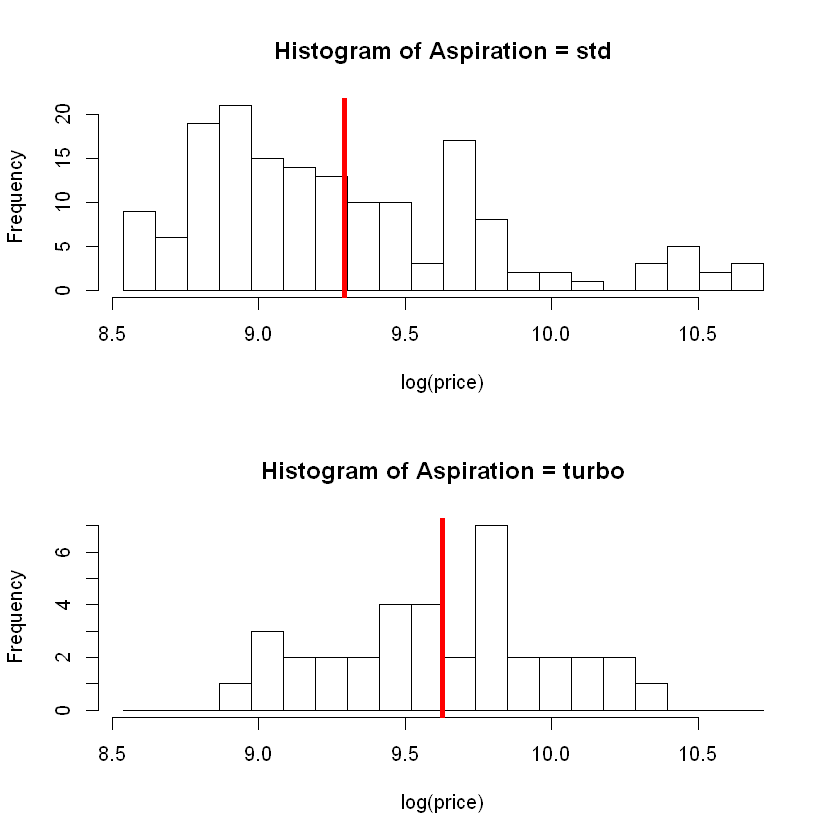

In [16]:
auto.std=data.matrix(select(filter(auto.data, aspiration =='std'),price))
auto.turbo=data.matrix(select(filter(auto.data, aspiration =='turbo'),price))
plot.t(auto.std, auto.turbo, 'log(price)','Aspiration = std','Aspiration = turbo')
t.test(auto.std,auto.turbo, alternative = "two.sided")

Based on the small P value, we can conclude that the alternative hypothesis, that the means are different, is true.


	Welch Two Sample t-test

data:  auto.fwd and auto.rwd
t = -12.249, df = 124.86, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8353264 -0.6029345
sample estimates:
mean of x mean of y 
 9.076065  9.795195 


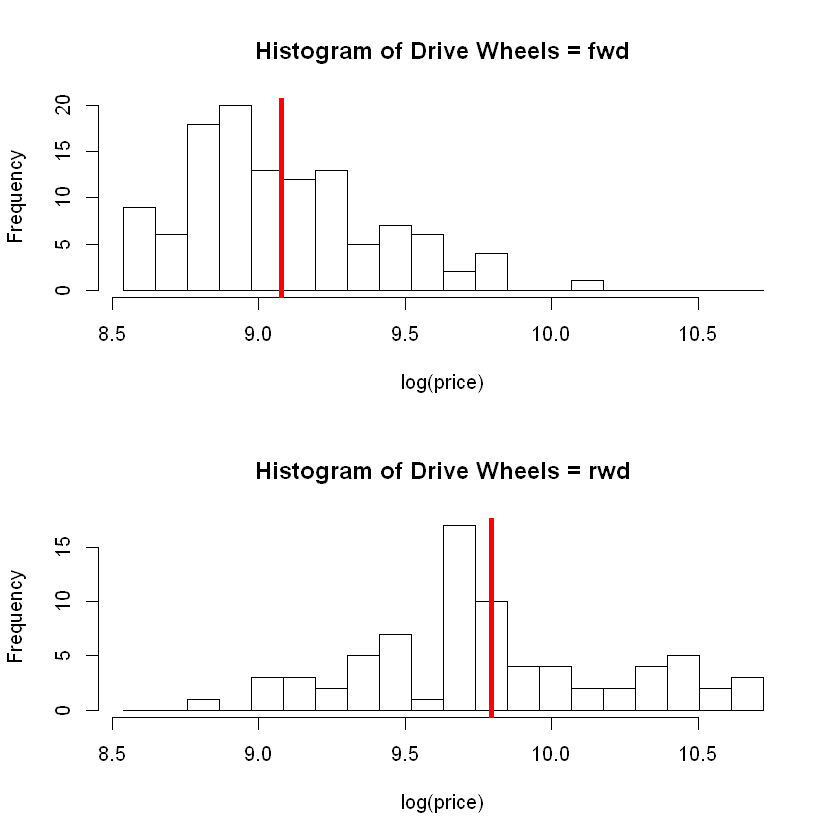

In [17]:
auto.fwd=data.matrix(select(filter(auto.data, drive.wheels =='fwd'),price))
auto.rwd=data.matrix(select(filter(auto.data, drive.wheels =='rwd'),price))
plot.t(auto.fwd, auto.rwd, 'log(price)','Drive Wheels = fwd','Drive Wheels = rwd')
t.test(auto.fwd,auto.rwd, alternative = "two.sided")

Again, based on the small P value, we can conclude that the alternative hypothesis, that the means are different, is true.

##Analysis of variance for number of doors and body style

In [29]:
###
# ANOVA - Doors
###

numdoors.count <- data.frame(count(auto.data,num.of.doors))
numdoors.count


num.of.doors,n
?,2
four,112
two,85


There are 2 entries with bad data - discard

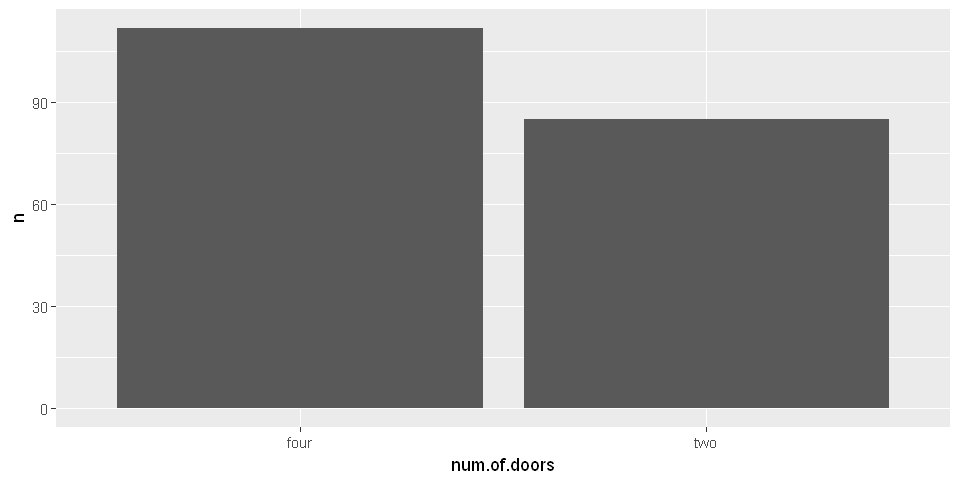

In [31]:
numdoors.count <- subset (numdoors.count, num.of.doors!='?')
ggplot(numdoors.count,aes(x=num.of.doors, y=n))+geom_bar(stat='identity')


Plenty of data in both categories!

Call:
   aov(formula = val ~ group, data = df)

Terms:
                     group  Residuals
Sum of Squares  0.00220709 0.16659976
Deg. of Freedom          1        195

Residual standard error: 0.0292294
Estimated effects may be unbalanced


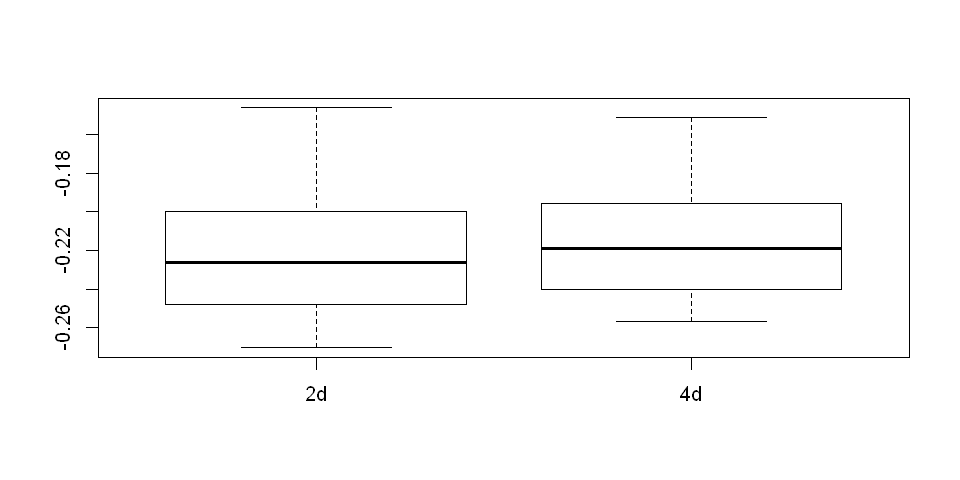

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = val ~ group, data = df)

$group
             diff          lwr        upr     p adj
4d-2d 0.006758103 -0.001534414 0.01505062 0.1096119



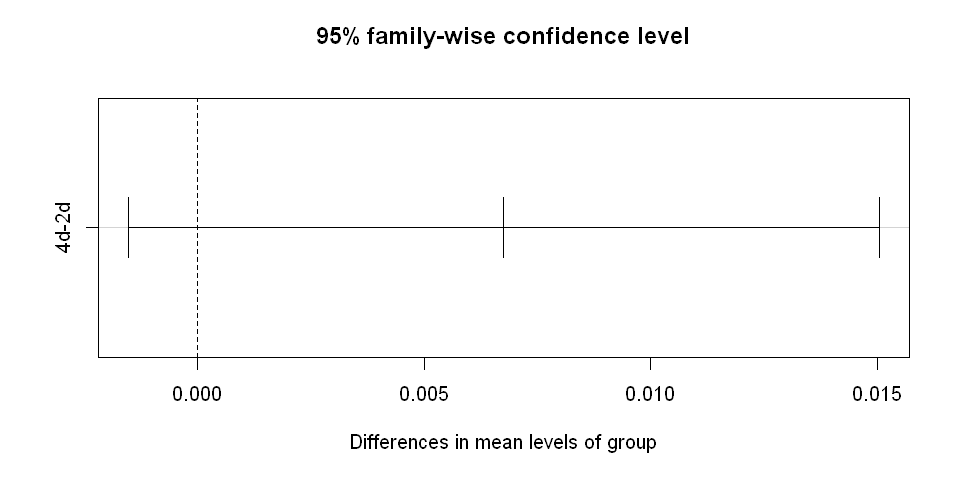

In [32]:
auto.2d=filter(auto.data, num.of.doors == 'two')
auto.4d=filter(auto.data, num.of.doors == 'four')

df.door <- data.frame('group'=c(rep('2d',length(auto.2d$price)),
                           rep('4d',length(auto.4d$price))),
                 'val' = c(auto.2d$price,auto.4d$price))

ANOVA.plot(df.door)

Visually they look similar, and the Tukey test implies that we cannot reject the null hypothesis that they are the same.

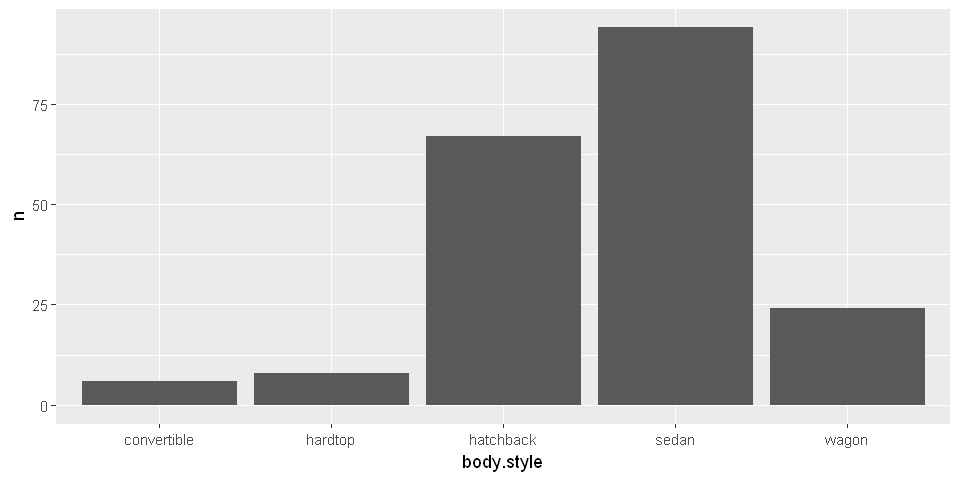

In [33]:
###
# ANOVA - Body Type
###

body.count <- data.frame(count(auto.data,body.style))
ggplot(body.count,aes(x=body.style, y=n))+geom_bar(stat='identity')
# Hmm, convertibles and hardtops don't have much data - discard from ANOVA

Call:
   aov(formula = val ~ group, data = df)

Terms:
                     group  Residuals
Sum of Squares  0.01340611 0.13056734
Deg. of Freedom          2        182

Residual standard error: 0.02678438
Estimated effects may be unbalanced


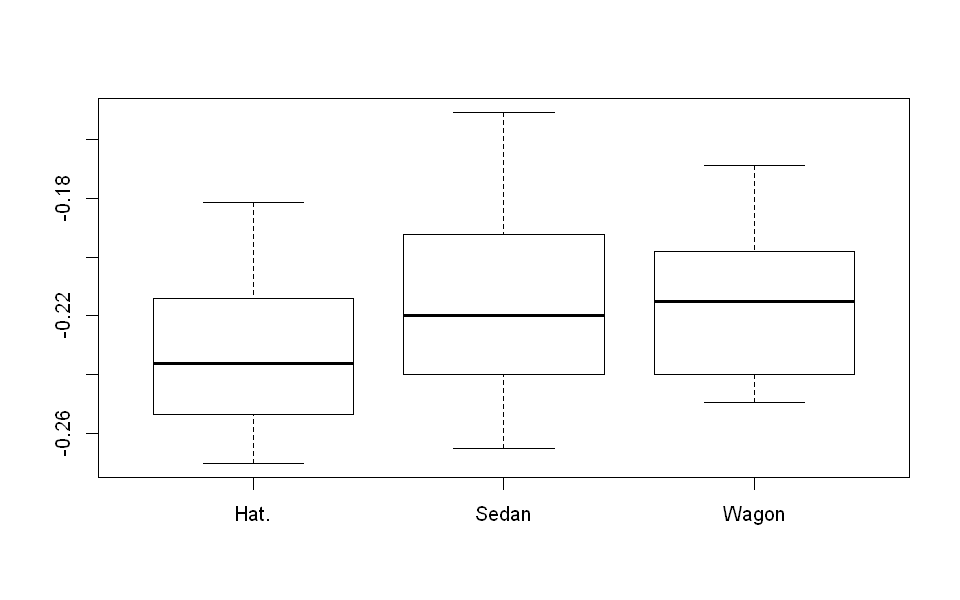

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = val ~ group, data = df)

$group
                    diff           lwr        upr     p adj
Sedan-Hat.   0.018320636  0.0082009818 0.02844029 0.0000899
Wagon-Hat.   0.014333768 -0.0007229989 0.02939054 0.0657728
Wagon-Sedan -0.003986868 -0.0184620993 0.01048836 0.7921255



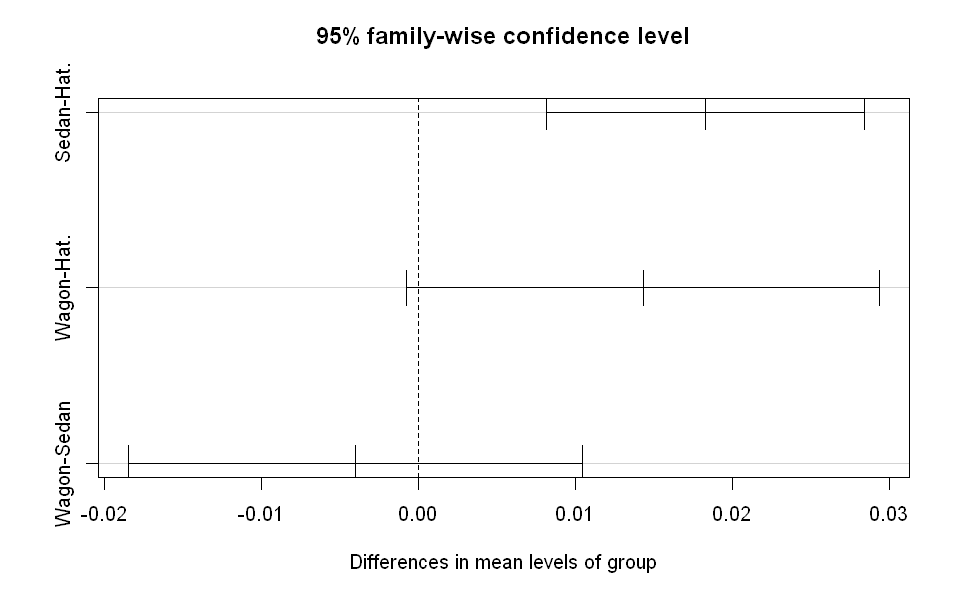

In [36]:
auto.hat=filter(auto.data, body.style == 'hatchback')
auto.sed=filter(auto.data, body.style == 'sedan')
auto.wag=filter(auto.data, body.style == 'wagon')

df.body <- data.frame('group'=c(rep('Hat.',length(auto.hat$price)),
                           rep('Sedan',length(auto.sed$price)),
                           rep('Wagon',length(auto.wag$price))),
                 'val' = c(auto.hat$price,auto.sed$price,auto.wag$price))

ANOVA.plot(df.body)

Based on the Tukey coefficients, there is not a significant price difference between wagons and sedans, but there is for both wagons and hatchbacks and hatchbacks vs. sedans.